# Mercedes-Benz Greener Manufacturing Dataset - Descripción de Variables

Este dataset fue parte de una competencia de Kaggle. El objetivo es minimizar el tiempo de prueba de los autos en la línea de ensamblaje prediciendo la variable `y`.

## Variables Principales

| Columna | Descripción |
|---------|-------------|
| **ID**      | Identificador único del vehículo |
| **y**       | Variable objetivo: tiempo que tarda el automóvil en pasar la prueba de calidad (regresión) |
| **X0** a **X8** | Variables categóricas (representan códigos de procesos, materiales o estaciones en la línea de ensamblaje) |
| **X10** a **X385** | Variables binarias (indican la presencia o ausencia de ciertas condiciones, pasos, sensores o configuraciones durante el proceso de fabricación) |

### Características del Dataset

- **Total de columnas**: 378 (1 ID + 1 objetivo + 8 categóricas + 368 binarias)
- **Tipo de problema**: Regresión
- **Desafíos**:
  - Alta dimensionalidad
  - Sparsity: muchas variables son casi completamente cero
  - Muchas variables categóricas requieren codificación eficiente (como `OneHotEncoder` o `OrdinalEncoder`)



# Study the models to use for solving the problem

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get the data

In [2]:
data = pd.read_csv("data/processed/train.csv")

In [3]:
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
data.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Verify the null values

In [6]:
data.isnull().sum().sort_values(ascending=False)

X385    0
ID      0
y       0
X0      0
X1      0
       ..
X14     0
X13     0
X12     0
X11     0
X10     0
Length: 378, dtype: int64

No null values are found

# Set categorical and binary columns

In [7]:
categorical_cols = ['X'+str(x) for x in range(0, 7)] + ['X8']
binary_cols = ['X'+str(x) for x in range(10, 186)]

print('Cat cols:')
print(categorical_cols)

print('\nBin cols:')
print(binary_cols)

Cat cols:
['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

Bin cols:
['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X1

# Express EDA

X0


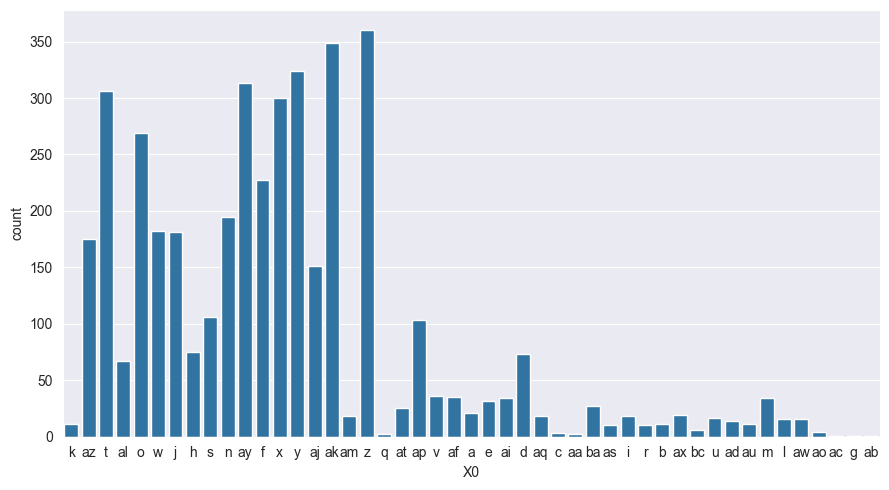

X1


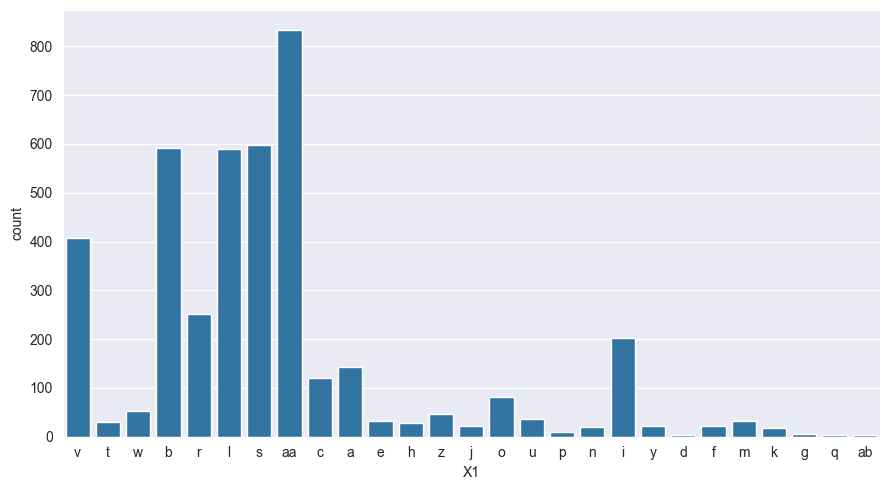

X2


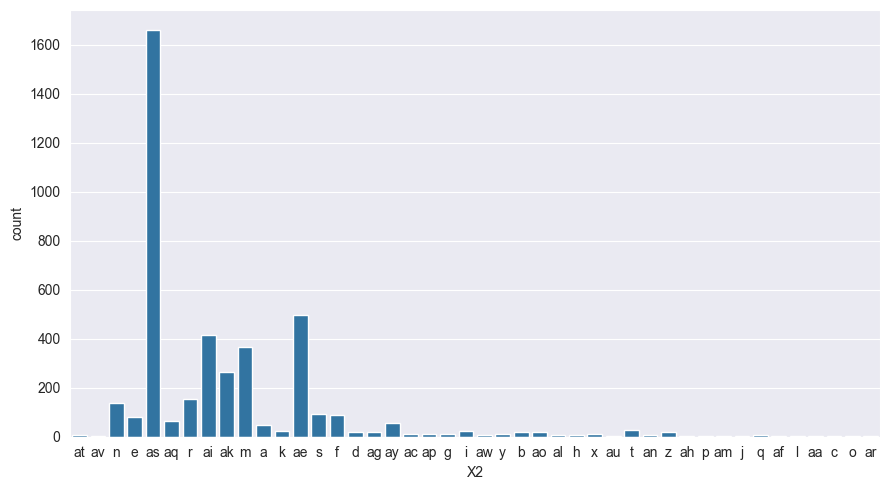

X3


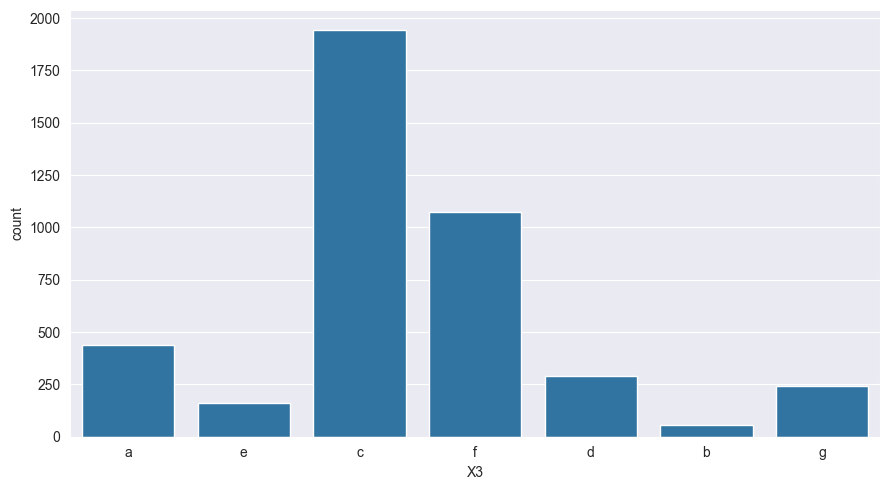

X4


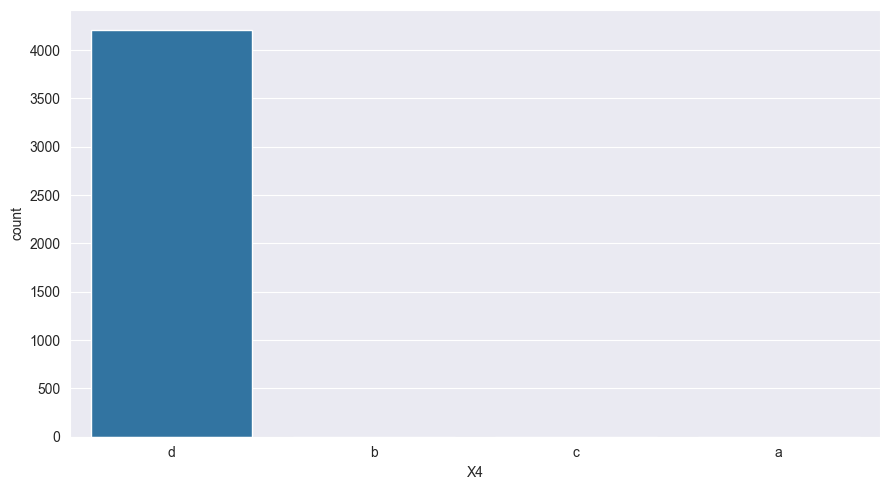

X5


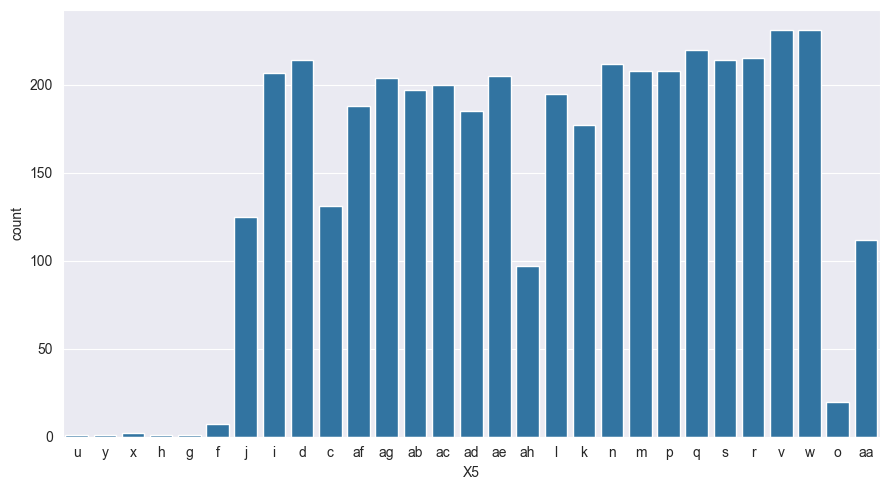

X6


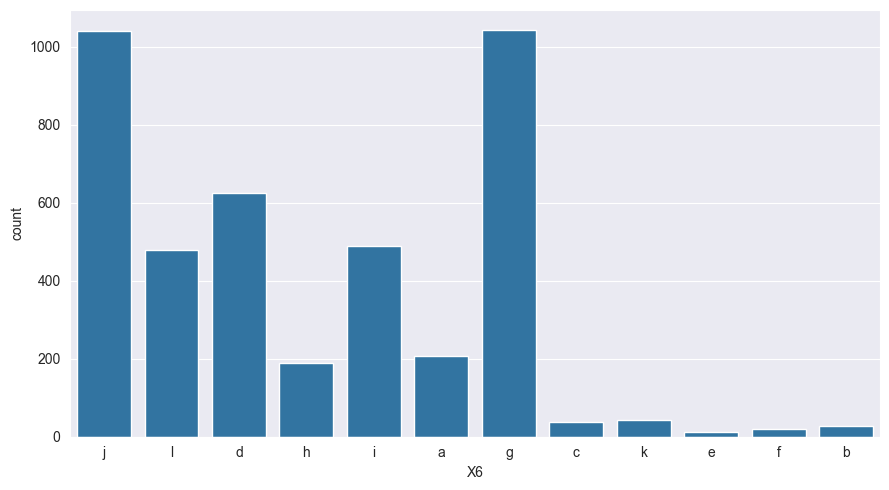

X8


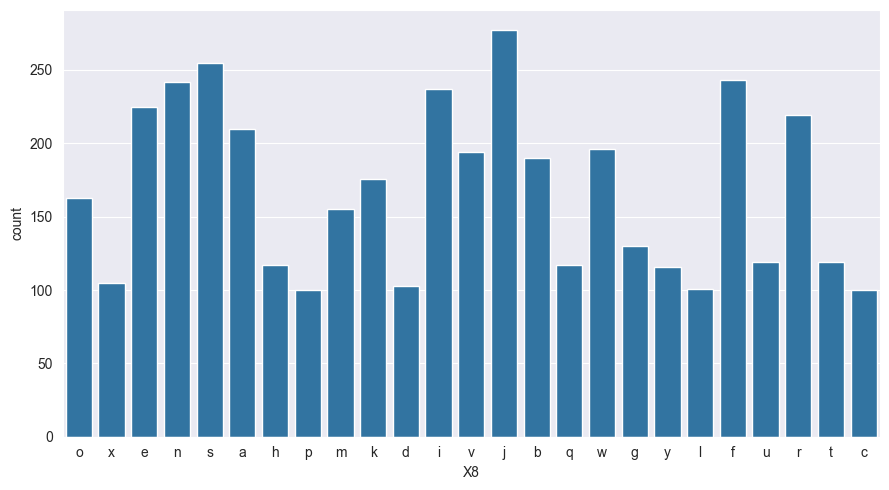

In [8]:
"""
Create histograms for each categorical feature to see the count for each categorical feature.
"""

for idx, col in enumerate(categorical_cols):
    print(col)
    fig, axis = plt.subplots(figsize=(9, 5))

    # graph the plot
    sns.countplot(data=data, x=f'{col}')

    # adjust the layout
    plt.tight_layout()

    # show the plot
    plt.show()

## Separate the target and the features

In [9]:
i_features = data.drop(columns=['ID', 'y'])
target = data['y']

# One hot encode the categorical features

In [10]:
from sklearn.preprocessing import OneHotEncoder


data_to_encode = i_features.copy()

# create the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# fit the encoder and transform the train data
encoded_cols = pd.DataFrame(encoder.fit_transform(data_to_encode[categorical_cols]))
print('Encoded columns:', encoded_cols)

# get the feature names of the new created columns
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)
print('Encoded columns:', encoded_cols.columns)

# drop the original columns to just save the encoded ones
data_to_encode = data_to_encode.drop(categorical_cols, axis=1)

# concat the new columns to the original dataframe
data_to_encode = pd.concat([data_to_encode, encoded_cols], axis=1)

final_i_features = data_to_encode.copy()

Encoded columns:       0    1    2    3    4    5    6    7    8    9    ...  185  186  187  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4204  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
4205  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4206  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
4207  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
4208  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      188  189  190  191  192  193  194  
0   

See the final dataframe

In [11]:
final_i_features.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Separate the data

In [12]:
from src.utils import split_my_data

# set independent and dependent variables
X: pd.DataFrame = final_i_features
y: pd.Series = target

# divide the dataset into training and test samples
X_train, X_test, y_train, y_test = split_my_data(X, y, test_size=0.2, random_state=42)

# Use a XGBoost regressor model

In [13]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [14]:
# make the prediction
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'r2 score: {r2}')
print(f'MSE: {mse}')

r2 score: 0.4923340052476728
MSE: 79.0181814427481
